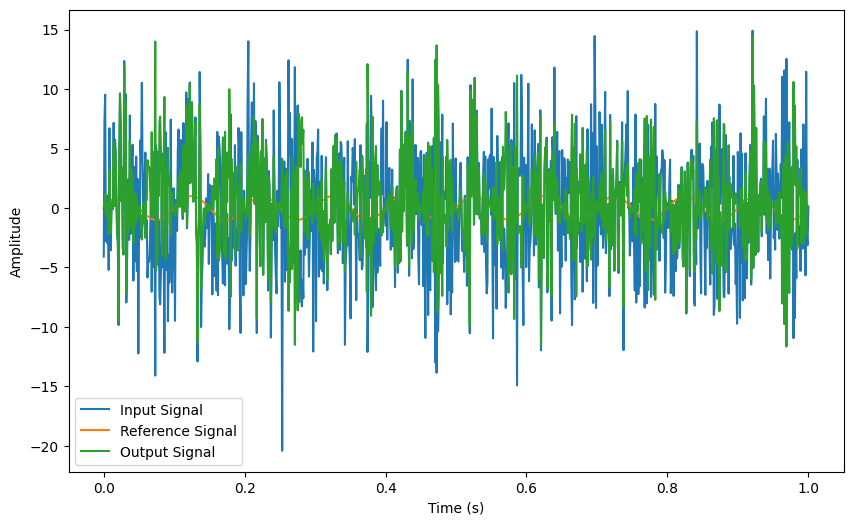

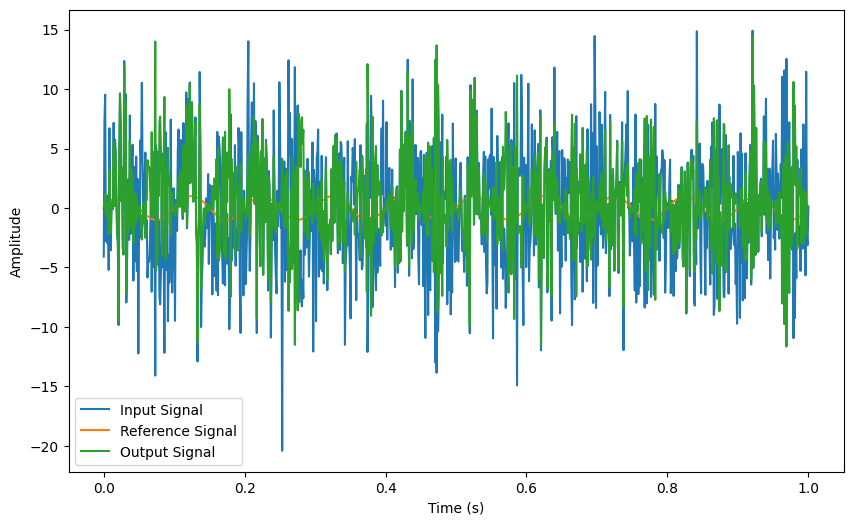

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 生成输入信号
t = np.linspace(0, 1, 1000)  # 时间范围为0到1秒
f_signal = 10  # 输入信号频率为10Hz
original_signal = np.sin(2 * np.pi * f_signal * t)

# 生成噪声信号,噪声相对信号5倍
noise = np.random.normal(0, 5, len(t)) 

# 输入信号=原始信号+噪声信号
input_signal=original_signal+noise 

# 生成参考信号
f_reference = 10  # 参考信号频率为10.1Hz
reference_signal = np.sin(2 * np.pi * f_reference * t)

# 锁相放大器的乘法器
output_signal = input_signal * reference_signal

# 绘制输入信号、参考信号和输出信号的图表
plt.figure(figsize=(10, 6))
plt.plot(t, input_signal, label='Input Signal')
plt.plot(t, reference_signal, label='Reference Signal')
plt.plot(t, output_signal, label='Output Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# 绘制锁相放大器计算出来的
plt.figure(figsize=(10, 6))
plt.plot(t, input_signal, label='Input Signal')
plt.plot(t, reference_signal, label='Reference Signal')
plt.plot(t, output_signal, label='Output Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

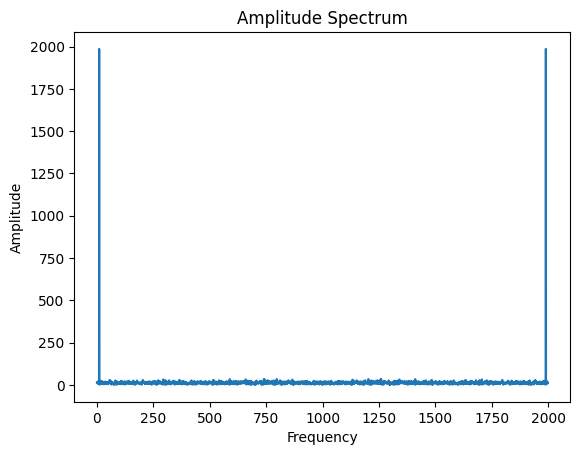

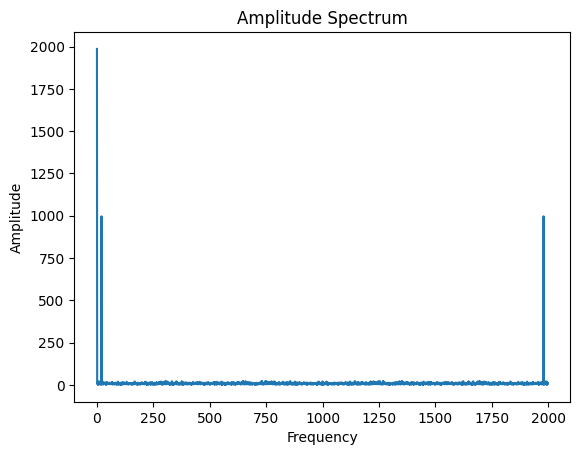

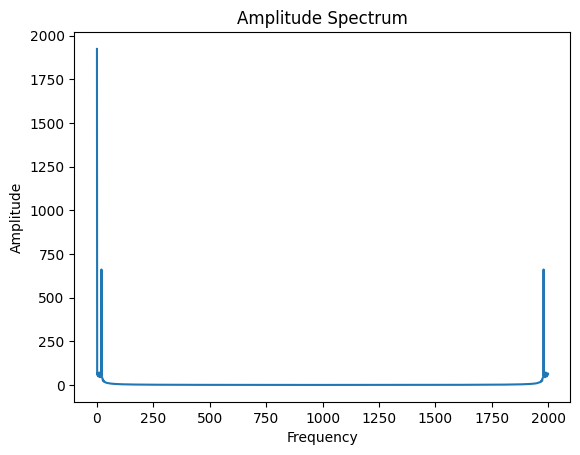

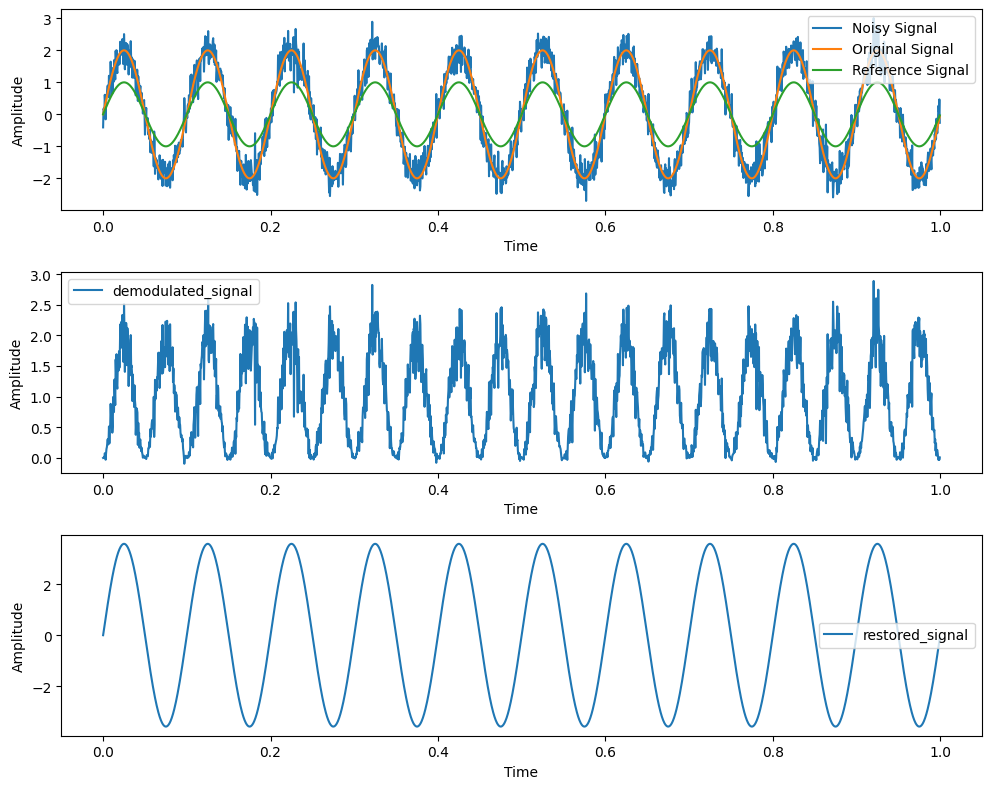

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Parameters
sampling_rate = 2000  # Sampling rate (Hz)
signal_freq = 10  # Frequency of the original signal (Hz)
reference_freq = 10  # Frequency of the reference signal (Hz)
noise_amplitude =0.3  # Amplitude of the noise signal
signal_amplitude = 2  # Amplitude of the original signal

t = np.arange(0, 1, 1/sampling_rate)

# 生成原始信号
signal = signal_amplitude * np.sin(2 * np.pi * signal_freq * t)
# 生成噪声信号
noise = noise_amplitude * np.random.randn(len(t))
noisy_signal = signal + noise
# 生成参考信号
reference_signal = np.sin(2 * np.pi * reference_freq * t)

# 乘法器
demodulated_signal = noisy_signal * reference_signal

# 低通滤波器
cutoff_freq = 2 * signal_freq     # 截断频率
normalized_cutoff_freq = cutoff_freq / (0.5 * sampling_rate)  #归一化
b, a = butter(5, normalized_cutoff_freq, 'low')
filtered_signal = lfilter(b, a, demodulated_signal)

amplitude = (np.max(filtered_signal) - np.min(filtered_signal))/1 #求出振幅

restored_signal=amplitude*np.sin(2 * np.pi * signal_freq * t)

#---------------输入带噪声信号的频谱---------------
spectrum = np.fft.fft(noisy_signal)
# 计算信号的振幅谱
amplitude_spectrum = np.abs(spectrum)
# 创建频谱图像
plt.figure()
plt.plot(amplitude_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()
#---------------乘法后信号的频谱---------------
# 计算信号的频谱
spectrum = np.fft.fft(demodulated_signal)
# 计算信号的振幅谱
amplitude_spectrum = np.abs(spectrum)
# 创建频谱图像
plt.figure()
plt.plot(amplitude_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()
#---------------滤波后信号的频谱---------------
# 计算信号的频谱
spectrum = np.fft.fft(filtered_signal)
# 计算信号的振幅谱
amplitude_spectrum = np.abs(spectrum)
# 创建频谱图像
plt.figure()
plt.plot(amplitude_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.show()


# 绘图
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reference_signal, label='Reference Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()


plt.subplot(3, 1, 2)
plt.plot(t, demodulated_signal, label='demodulated_signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, restored_signal, label='restored_signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()